In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


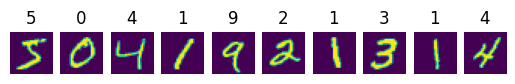

In [4]:
fig, ax = plt.subplots(1,10)
for i in range(10):
    ax[i].imshow(X_train[i])
    ax[i].set_title(Y_train[i])
    ax[i].axis('off')

In [6]:
from sklearn.model_selection import train_test_split
X_training, X_validation, Y_training, Y_validation = train_test_split(X_train, Y_train, test_size = 0.15,random_state = 1212)

In [7]:
print(X_training.shape, Y_training.shape)
print(X_validation.shape, Y_validation.shape)
print(X_test.shape, Y_test.shape)

(51000, 28, 28) (51000,)
(9000, 28, 28) (9000,)
(10000, 28, 28) (10000,)


In [9]:
channel = 1
X_training = X_training.reshape(X_training.shape[0],X_training.shape[1], X_training.shape[2], channel)
X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1], X_validation.shape[2], channel)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], X_test.shape[2], channel)

In [10]:
print(X_training.shape, Y_training.shape)
print(X_validation.shape, Y_validation.shape)
print(X_test.shape, Y_test.shape)

(51000, 28, 28, 1) (51000,)
(9000, 28, 28, 1) (9000,)
(10000, 28, 28, 1) (10000,)


In [11]:
X_train_norm = X_training.astype(np.float32)/255.0
X_validation_norm = X_validation.astype(np.float32)/255.0
X_test_norm = X_test.astype(np.float32)/255.0

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(5,5), filters=8, strides=1, activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Conv2D(kernel_size=(5,5), filters=16, strides=1, activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

In [15]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimizer, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [16]:
hist = model.fit(X_train_norm, Y_training, epochs=10, validation_data=(X_validation_norm, Y_validation))

Epoch 1/10
1594/1594 [==============================] - 12s 4ms/step - loss: 0.2480 - accuracy: 0.9247 - val_loss: 0.0721 - val_accuracy: 0.9793
Epoch 2/10
1594/1594 [==============================] - 7s 5ms/step - loss: 0.0844 - accuracy: 0.9740 - val_loss: 0.0503 - val_accuracy: 0.9857
Epoch 3/10
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0602 - accuracy: 0.9813 - val_loss: 0.0467 - val_accuracy: 0.9859
Epoch 4/10
1594/1594 [==============================] - 7s 5ms/step - loss: 0.0474 - accuracy: 0.9842 - val_loss: 0.0347 - val_accuracy: 0.9894
Epoch 5/10
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0449 - val_accuracy: 0.9871
Epoch 6/10
1594/1594 [==============================] - 7s 5ms/step - loss: 0.0333 - accuracy: 0.9893 - val_loss: 0.0376 - val_accuracy: 0.9896
Epoch 7/10
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0360 - val_accuracy

In [17]:
val_loss, val_accuracy = model.evaluate(X_validation_norm, Y_validation)
print("val_loss: ", val_loss)
print("val_accuracy: ", val_accuracy)

282/282 [==============================] - 1s 2ms/step - loss: 0.0338 - accuracy: 0.9917
val_loss:  0.033759091049432755
val_accuracy:  0.9916666746139526


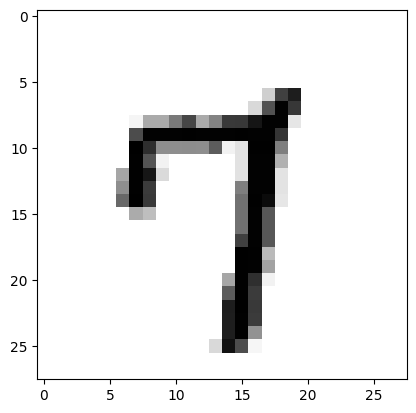

In [19]:
plt.imshow(X_validation_norm[0].reshape((28,28)), cmap=plt.cm.binary)
plt.show()

In [20]:
predictions = model.predict([X_validation_norm])
predictions = np.argmax(predictions, axis=1)
pd.DataFrame(predictions)

282/282 [==============================] - 1s 2ms/step


,0
0,7
1,4
2,1
3,3
4,0
...,...
8995,5
8996,9
8997,9
8998,3


In [21]:
type(predictions)

numpy.ndarray

In [22]:
predictions.shape

(9000,)

<ipython-input-26-347ef571ef4b>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(12,12,i+1)


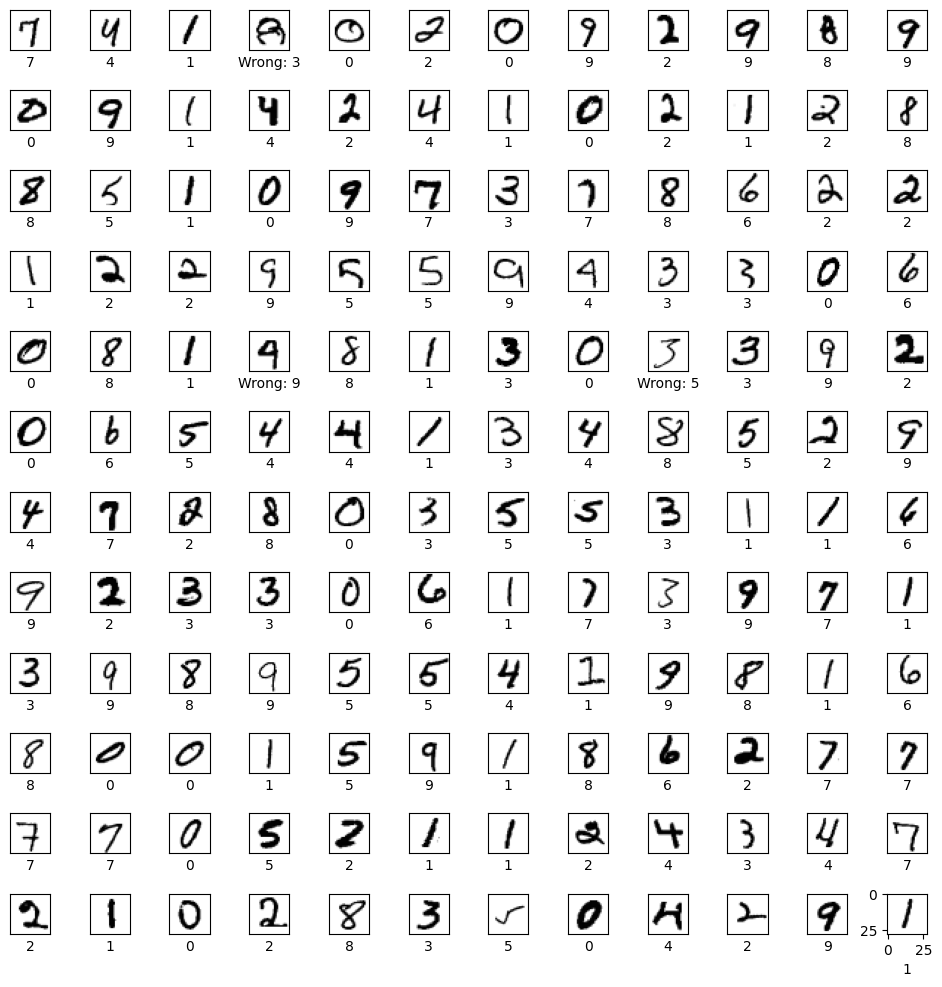

In [26]:
plt.figure(figsize=(12,12))
for i in range(144):
  predicted_label = predictions[i]
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.subplot(12,12,i+1)
  plt.imshow(X_validation_norm[i].reshape((28,28)), cmap=plt.cm.binary)
  if predicted_label==Y_validation[i]:
    plt.xlabel(predicted_label)
  else:
    text = "Wrong: "+str(predicted_label)
    plt.xlabel(text)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

In [27]:
confusion_matrix = tf.math.confusion_matrix(Y_validation, predictions)

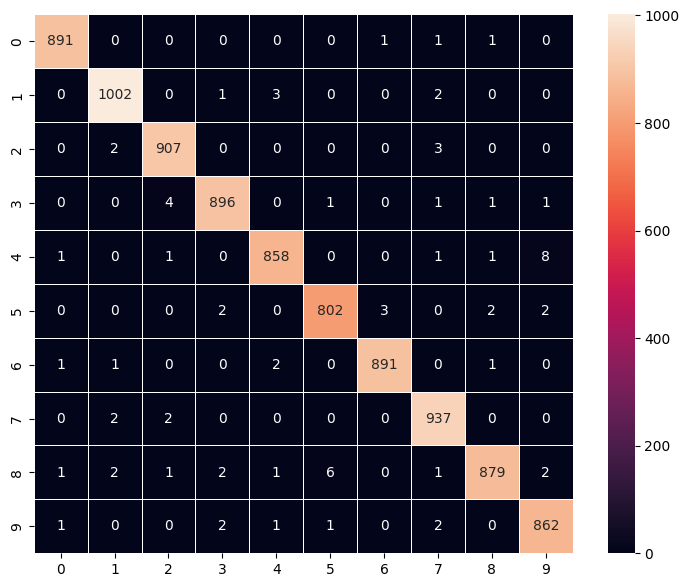

In [28]:
import seaborn as sn
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()